# Statistiques : Final TP
Aurelien RAULO

#### Imports

In [69]:
import math
import numpy as np 
from os import mkdir
from numpy.linalg import inv
import csv
import random
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import statistics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import f_regression
import warnings

#### Question 1

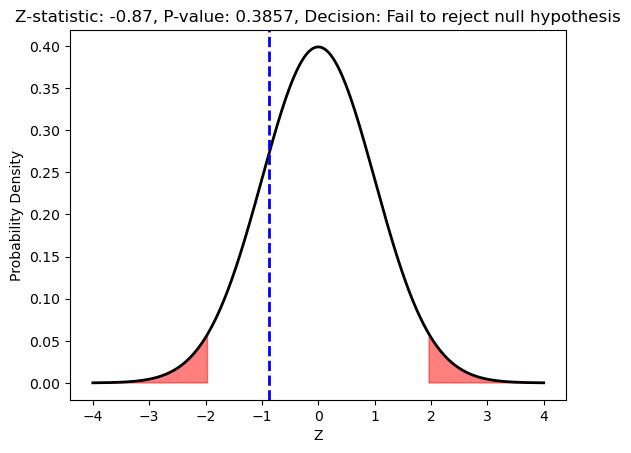

Sample 1:
Z-statistic: -0.8673508233044469
Reject Region: (-1.959963984540054, 1.959963984540054)
P-value: 0.385749817720646
Decision: Fail to reject null hypothesis



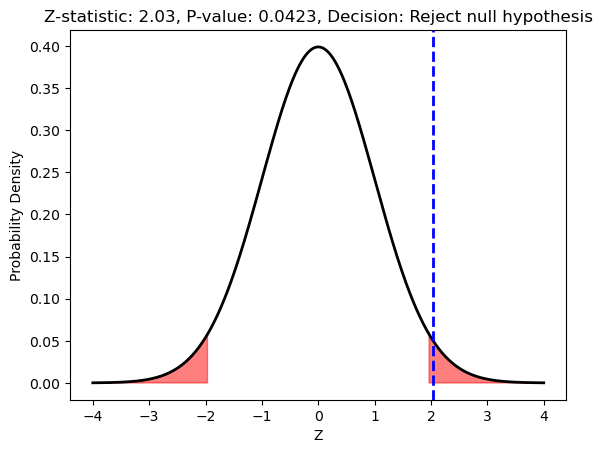

Sample 2:
Z-statistic: 2.0309235700794526
Reject Region: (-1.959963984540054, 1.959963984540054)
P-value: 0.04226274837848898
Decision: Reject null hypothesis



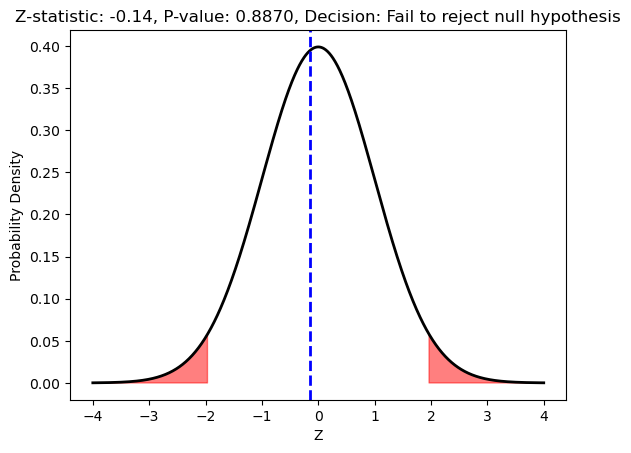

Sample 3:
Z-statistic: -0.14205525717244427
Reject Region: (-1.959963984540054, 1.959963984540054)
P-value: 0.8870363592834192
Decision: Fail to reject null hypothesis



In [39]:
n = 100
mu = 2.0
sigma = 1.0
alpha = 0.05

# Generate three different Gaussian samples
samples = [np.random.normal(mu, sigma, n) for _ in range(3)]

for i, sample in enumerate(samples):
    X_bar = np.mean(sample)
    z_statistic = (X_bar - mu) / (sigma / np.sqrt(n))
    p_value = 2 * (1 - norm.cdf(abs(z_statistic)))  # Two-tailed test

    # Determine the reject region based on the significance level
    critical_value = norm.ppf(1 - alpha / 2)
    reject_region_left, reject_region_right = -critical_value, critical_value

    # Make a decision based on the p-value
    if p_value < alpha:
        decision = "Reject null hypothesis"
    else:
        decision = "Fail to reject null hypothesis"

    # Plotting
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x)

    plt.plot(x, y, 'k-', lw=2)
    plt.fill_between(x, y, where=(x < reject_region_left) | (x > reject_region_right), color='red', alpha=0.5)
    plt.axvline(z_statistic, color='blue', linestyle='dashed', linewidth=2)
    plt.title(f"Z-statistic: {z_statistic:.2f}, P-value: {p_value:.4f}, Decision: {decision}")
    plt.xlabel('Z')
    plt.ylabel('Probability Density')
    plt.show()
    
    print(f"Sample {i+1}:")
    print(f"Z-statistic: {z_statistic}")
    print(f"Reject Region: {reject_region}")
    print(f"P-value: {p_value}")
    print(f"Decision: {decision}")
    print()



En cas de petits échantillons (par exemple, n= 20), on devrait utiliser la distribution t de Student au lieu de la distribution normale standard pour le calcul de la p-valeur et des régions de rejet, car la distribution t de Student prend en compte la variabilité accrue des petits échantillons.

#### Question 2

In [49]:
data = pd.read_csv("data_dm3.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

r2_test = r2_score(y_test, model.predict(X_test))
mse_test = mean_squared_error(y_test, model.predict(X_test))

print(f"R-squared test: {r2}")
print(f"Mean Squared Error test: {mse}\n")

R-squared test: 0.4829120810184364
Mean Squared Error test: 3052.2382431779024



#### Question 3

In [60]:
## Q3.a et Q3.b
def forward_variable_selection(X_train, y_train, alpha=0.1):
    
    selected_variables = []
    V = list(range(X_train.shape[1]))
    y_bar = y_train.copy()

    while True:
        best_p_value = float("inf")
        best_variable_index = -1

        for i in V:
            x = X_train.iloc[:, i]
            x_with_const = sm.add_constant(x)
            model = sm.OLS(y_bar, x_with_const).fit()

            # Perform a hypothesis test
            p_value = model.pvalues[-1]
            if p_value < best_p_value:
                best_p_value = p_value
                best_variable_index = i
            
        
        if best_p_value < alpha:
            selected_variables.append(best_variable_index)
            V.remove(best_variable_index)

            x = X_train.iloc[:, best_variable_index]
            x_with_const = sm.add_constant(x)
            model = sm.OLS(y_bar, x_with_const).fit()
            y_bar = y_bar - model.predict(x_with_const)
            print(f"Selected variable: {X_train.columns[best_variable_index]}, p-value: {best_p_value}")
            
        else:
            break

    
    return selected_variables

selected_variables = forward_variable_selection(X, y)
print(f"Selected variables : {selected_variables}")

Selected variable: 1.297088462391000618e+00, p-value: 2.7038065020384593e-42
Selected variable: 4.185505800145987165e-01, p-value: 3.110272985495501e-16
Selected variable: -9.297458111228392719e-01, p-value: 0.008556817017931633
Selected variable: 4.598399303640411939e-01, p-value: 0.0013967201396781715
Selected variable: -5.323801622311420401e-01, p-value: 0.008813581600276526
Selected variable: 3.415852216728040847e-01, p-value: 0.03379956306223184
Selected variable: -3.792057195330847952e-01, p-value: 0.017887460599645185
Selected variable: 6.349793274139390320e-01, p-value: 0.044489664201907426
Selected variable: 2.150961139501001429e-01, p-value: 0.06603942202291883
Selected variable: 1.065488479751466766e+00, p-value: 0.0735620865007965
Selected variable: -9.124505270223775000e-01, p-value: 0.05848054270084147
Selected variable: 1.365251036526797579e+00, p-value: 0.06625669362995414
Selected variables : [58, 123, 133, 167, 129, 31, 13, 5, 208, 135, 174, 183]


In [61]:
## Q3.c

# Selecting the variables in the train and test set
X_train_selected = X_train.iloc[:, selected_variables]
X_test_selected = X_test.iloc[:, selected_variables]

# Adding a constant for the intercept
X_train_selected_with_const = sm.add_constant(X_train_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

# Fit the model
model = sm.OLS(y_train, X_train_selected_with_const).fit()

# Make predictions and calculate metrics
y_train_pred = model.predict(X_train_selected_with_const)
y_test_pred = model.predict(X_test_selected_with_const)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'r2_train = {r2_train}, r2_test = {r2_test},\nmse_train = {mse_train}, mse_test = {mse_test}')

r2_train = 0.5317839363788135, r2_test = 0.5800893920272842,
mse_train = 2763.760132453911, mse_test = 2561.1036610327596


#### Question 4

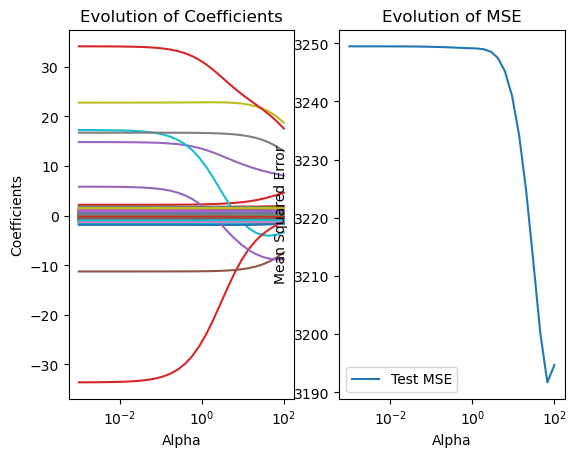

In [62]:
def ridge_regression(X_train, X_test, y_train, y_test, alphas):
    train_errors = []
    test_errors = []
    coefficients = []

    for alpha in alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)

        train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
        test_errors.append(mean_squared_error(y_test, model.predict(X_test)))
        coefficients.append(model.coef_)
    return train_errors, test_errors, coefficients

alphas = np.logspace(-3, 2, 30)
train_errors, test_errors, coefficients = ridge_regression(X_train, X_test, y_train, y_test, alphas)


# Question 4.a
plt.subplot(121)
plt.semilogx(alphas, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Evolution of Coefficients')

# Question 4.b
plt.subplot(122)
plt.semilogx(alphas, test_errors, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Evolution of MSE')
plt.legend()
plt.show()


#### Question 5

In [63]:
def select_penalty_parameter_ridge(X, y, alphas):
    model = RidgeCV(alphas=alphas, cv=10)
    model.fit(X, y)
    
    best_alpha = model.alpha_
    r2 = model.score(X, y)
    mse = mean_squared_error(y, model.predict(X))

    print(f"Best Alpha: {best_alpha}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

alphas = np.logspace(-3, 2, 30)
select_penalty_parameter_ridge(X, y, alphas)



Best Alpha: 67.23357536499334
R-squared: 0.5669269589989452
Mean Squared Error: 2573.895315968912


#### Question 6

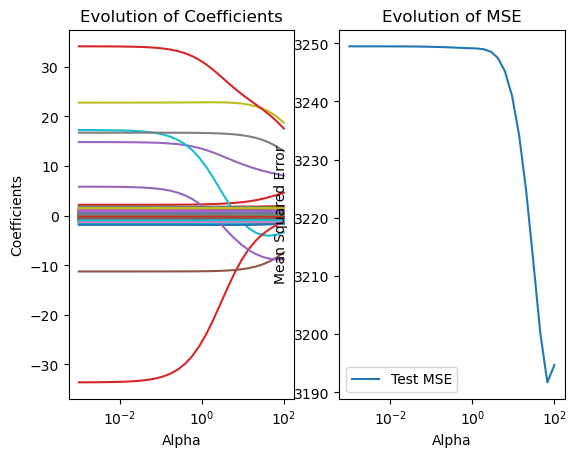

In [64]:
def lasso_regression(X_train, X_test, y_train, y_test, alphas):
    train_errors = []
    test_errors = []
    coefficients = []

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        for alpha in alphas:
            model = Lasso(alpha=alpha)
            model.fit(X_train, y_train)

            train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
            test_errors.append(mean_squared_error(y_test, model.predict(X_test)))
            coefficients.append(model.coef_)
        return train_errors, test_errors, coefficients

alphas = np.logspace(-3, 2, 30)
train_errors, test_errors, coefficients = ridge_regression(X_train, X_test, y_train, y_test, alphas)


plt.subplot(121)
plt.semilogx(alphas, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Evolution of Coefficients')

plt.subplot(122)
plt.semilogx(alphas, test_errors, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Evolution of MSE')
plt.legend()
plt.show()


La raison du Warning est que Lasso peut ne pas converger pour certaines valeurs alpha. Pour gérer cet avertissement, j'utilise le module warnings pour le supprimer temporairement.

#### Question 7

In [65]:
def select_penalty_parameter_lasso(X, y, alphas):
    model = LassoCV(alphas=alphas, cv=10)
    model.fit(X, y)
    
    best_alpha = model.alpha_
    r2 = model.score(X, y)
    mse = mean_squared_error(y, model.predict(X))
    
    print(f"Best Alpha: {best_alpha}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

alphas = np.logspace(-3, 2, 30)
select_penalty_parameter_lasso(X, y, alphas)


Best Alpha: 4.175318936560405
R-squared: 0.5126680845674378
Mean Squared Error: 2896.373626847335


#### Question 8

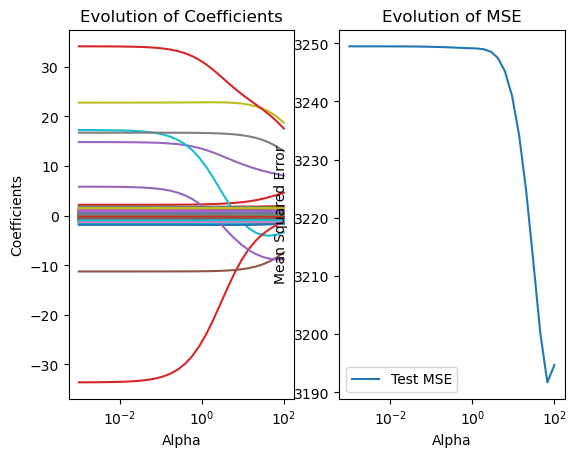

In [66]:
def elasticnet_regression(X_train, X_test, y_train, y_test, alphas):
    train_errors = []
    test_errors = []
    coefficients = []

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        for alpha in alphas:
            model = ElasticNet(alpha=alpha)
            model.fit(X_train, y_train)

            train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
            test_errors.append(mean_squared_error(y_test, model.predict(X_test)))
            coefficients.append(model.coef_)
            
        return train_errors, test_errors, coefficients

alphas = np.logspace(-3, 2, 30)
train_errors, test_errors, coefficients = ridge_regression(X_train, X_test, y_train, y_test, alphas)


plt.subplot(121)
plt.semilogx(alphas, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Evolution of Coefficients')

plt.subplot(122)
plt.semilogx(alphas, test_errors, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Evolution of MSE')
plt.legend()
plt.show()


La raison de ce Warning est la même que pour la méthode Lasso. Pour gérer cet avertissement, j'utilise le module warnings pour le supprimer temporairement.

#### Question 9

In [67]:
def select_penalty_parameter_elasticnet(X, y, alphas):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        model = ElasticNetCV(alphas=alphas, cv=10)
        model.fit(X, y)


        best_alpha = model.alpha_
        r2 = model.score(X, y)
        mse = mean_squared_error(y, model.predict(X))
    
    print(f"Best Alpha: {best_alpha}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")

alphas = np.logspace(-3, 2, 30)
select_penalty_parameter_elasticnet(X, y, alphas)

Best Alpha: 0.5736152510448681
R-squared: 0.5567559092825112
Mean Squared Error: 2634.3452048908885


#### Question 10

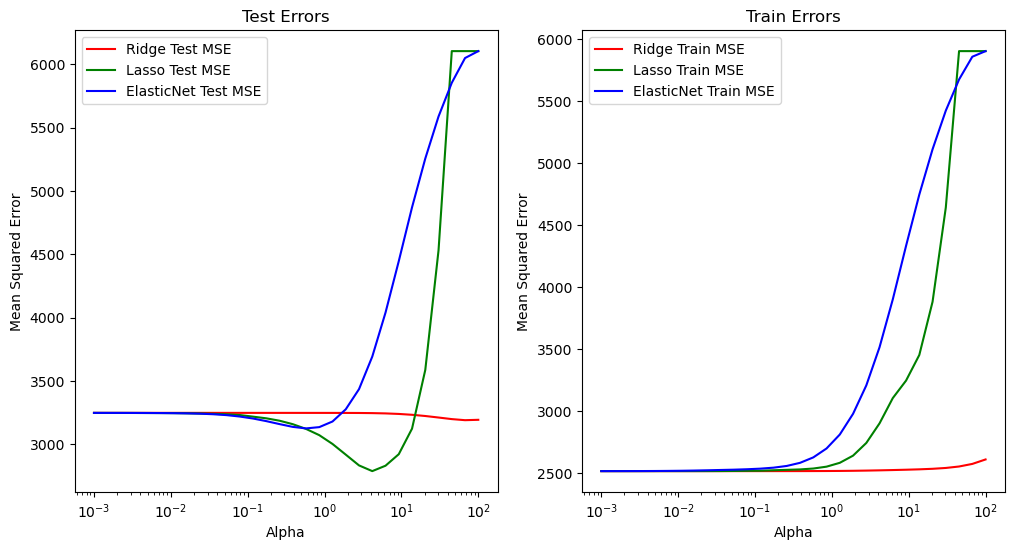

In [68]:
ridge_train_errors, ridge_test_errors, _ = ridge_regression(X_train, X_test, y_train, y_test, alphas)
lasso_train_errors, lasso_test_errors, _ = lasso_regression(X_train, X_test, y_train, y_test, alphas)
elasticnet_train_errors, elasticnet_test_errors, _ = elasticnet_regression(X_train, X_test, y_train, y_test, alphas)

# Plotting test and training errors
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.semilogx(alphas, ridge_test_errors, label='Ridge Test MSE', color='r')
plt.semilogx(alphas, lasso_test_errors, label='Lasso Test MSE', color='g')
plt.semilogx(alphas, elasticnet_test_errors, label='ElasticNet Test MSE', color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Test Errors')
plt.legend()

plt.subplot(122)
plt.semilogx(alphas, ridge_train_errors, label='Ridge Train MSE', color='r')
plt.semilogx(alphas, lasso_train_errors, label='Lasso Train MSE', color='g')
plt.semilogx(alphas, elasticnet_train_errors, label='ElasticNet Train MSE', color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Train Errors')
plt.legend()

plt.show()


### Différences :

- Type de pénalisation :
    - Ridge : Utilise la régularisation L2, qui ajoute la somme des carrés des coefficients au terme de coût. Cela conduit à des coefficients proches de zéro, mais pas exactement zéro.
    - Lasso : Utilise la régularisation L1, qui ajoute la somme des valeurs absolues des coefficients au terme de coût. Cela pousse de manière plus agressive certains coefficients vers zéro, effectuant ainsi une sélection automatique de fonctionnalités.
    - ElasticNet : Combine à la fois la régularisation L1 et L2, ajoutant les termes de régularisation L1 et L2 au terme de coût. Il offre un équilibre entre la sélection automatique de fonctionnalités de Lasso et la réduction de la variance de Ridge.
- Effet sur les coefficients :
    - Ridge : Les coefficients sont réduits vers zéro, mais ne deviennent généralement pas exactement zéro. Tous les prédicteurs sont inclus, bien que certains aient un impact plus faible.
    - Lasso : Effectue une sélection automatique de fonctionnalités en mettant certains coefficients exactement à zéro, éliminant ainsi certaines fonctionnalités du modèle.
    - ElasticNet : Offre un compromis, car il peut réduire certains coefficients exactement à zéro tout en réduisant les autres vers zéro.
- Robustesse face à la multicolinéarité :
    - Ridge : Est plus robuste à la multicolinéarité, car il réduit les coefficients de manière égale pour les variables fortement corrélées, préservant ainsi plus d'informations.
    - Lasso : Peut avoir du mal avec la multicolinéarité, car il tend à sélectionner une variable parmi celles fortement corrélées et à annuler les autres.
    - ElasticNet : Offre une certaine robustesse à la multicolinéarité en combinant les avantages de Ridge et de Lasso.

### Similitudes :

- Objectif de régularisation :
Les trois modèles visent à réduire le surajustement (overfitting) en ajoutant un terme de régularisation à la fonction de coût. Ils sont utilisés pour améliorer la généralisation des modèles linéaires en réduisant les valeurs des coefficients.
- Contrôle du surajustement :
Les trois modèles permettent de contrôler le surajustement en ajustant le paramètre de régularisation (alpha ou lambda). En augmentant ce paramètre, vous augmentez la force de la régularisation, ce qui conduit à des coefficients plus petits.
- Utilisation en régression linéaire :
Ridge, Lasso et ElasticNet sont tous utilisés en régression linéaire. Ils peuvent être appliqués pour résoudre des problèmes de régression avec un grand nombre de prédicteurs.